# CDC Diabetes Health Indicators

![](day.jpg)

The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes.

`Diabetes_binary` 0 = no diabetes 1 = prediabetes or diabetes

`HighBP` 0 = no high BP 1 = high BP

`HighChol` 0 = no high cholesterol 1 = high cholesterol

`CholCheck` 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

`BMI` Body Mass Index

`Smoker` Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

`Stroke` (Ever told) you had a stroke. 0 = no 1 = yes

`HeartDiseaseorAttack` coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

`PhysActivity` physical activity in past 30 days - not including job 0 = no 1 = yes

`Fruits` Consume Fruit 1 or more times per day 0 = no 1 = yes

`Veggies` Consume Vegetables 1 or more times per day 0 = no 1 = yes

`HvyAlcoholConsump` Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

`AnyHealthcare` Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

`NoDocbcCost` Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

`GenHlth` Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

`MentHlth` 	Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

`PhysHlth` Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

`DiffWalk` Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

`Sex` 0 = female 1 = male

`Age` 13-level age category 1=18-24, 2= 25-29"0, 3= 30-34, 4= 35-39, 5= 40-44,
            6= 45-49, 7= 50-54, 8= 55-59, 9= 60-64, 10= 65-69,
            11= 70-74, 12= 75-79, 13= >80

`Education` Education level  scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

`Income` Income scale 1-8 1=< $10.000, 2= $10.000 - $15.000, 3=$15.000 - 20.000, 4=$20.000 - 25.000,
               5=$25.000 - 35.000, 6=$35.000 - 50.000, 7=$50.000 - $75.000, 8:=>$70.000"



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import math

## Base de datos

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Estructura

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [125]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [126]:
col_indices = list(range(22))
col_names = df.columns[col_indices].tolist()
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: Diabetes_binary
1: HighBP
2: HighChol
3: CholCheck
4: BMI
5: Smoker
6: Stroke
7: HeartDiseaseorAttack
8: PhysActivity
9: Fruits
10: Veggies
11: HvyAlcoholConsump
12: AnyHealthcare
13: NoDocbcCost
14: GenHlth
15: MentHlth
16: PhysHlth
17: DiffWalk
18: Sex
19: Age
20: Education
21: Income


In [127]:
col_indices = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21]  
col_names = df.columns[col_indices].tolist()
df[col_names] = df[col_names].astype("category")

## Medidas y visualización

In [128]:

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular el coeficiente de variación solo en las numéricas
cv = df_numeric.std() / df_numeric.mean()
cv.name = 'Coef_Variación'

# Agregar el coeficiente de variación a las estadísticas descriptivas
desc_stats = pd.concat([df_numeric.describe(), cv.to_frame().T])

# Redondear y eliminar decimales
desc_stats = desc_stats.applymap(lambda x: f"{x:.2f}")

print(desc_stats)

                      BMI   MentHlth   PhysHlth
count           253680.00  253680.00  253680.00
mean                28.38       3.18       4.24
std                  6.61       7.41       8.72
min                 12.00       0.00       0.00
25%                 24.00       0.00       0.00
50%                 27.00       0.00       0.00
75%                 31.00       2.00       3.00
max                 98.00      30.00      30.00
Coef_Variación       0.23       2.33       2.06


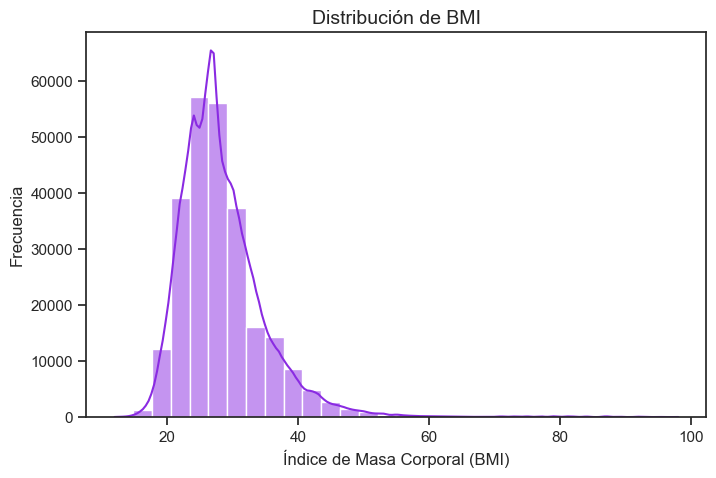

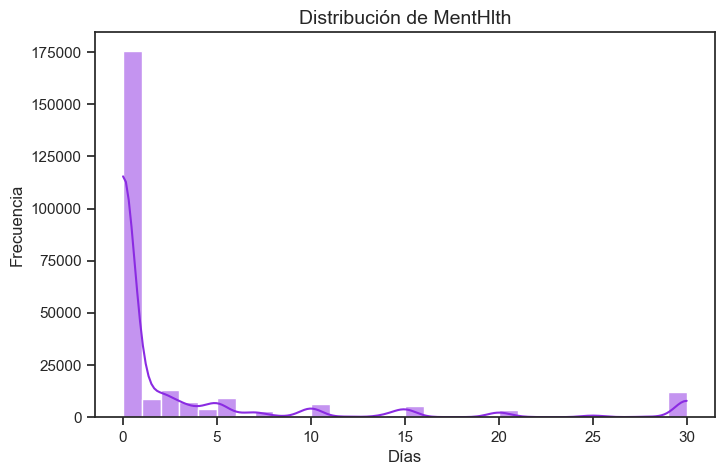

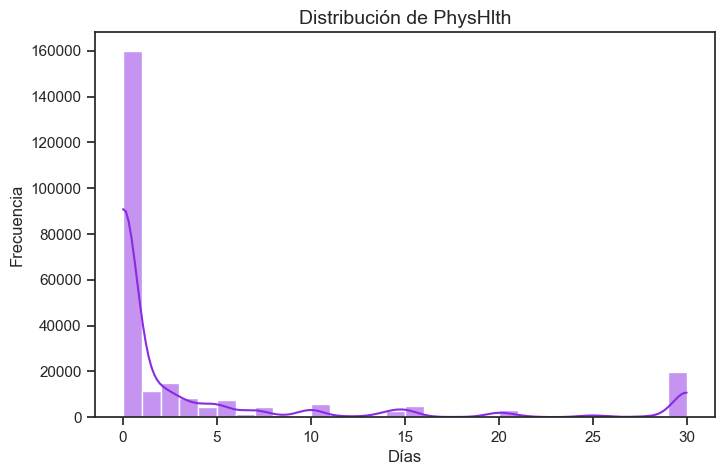

In [129]:

# Establecer estilo de los gráficos
sns.set_theme(style="ticks")

# Filtrar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns  

# Diccionario con etiquetas personalizadas para cada variable categórica
category_labels = {
    "Diabetes_binary": {0: "No Diabetes", 1: "Prediabetes/Diabetes"},
    "HighBP": {0: "Normal BP", 1: "High BP"},
    "HighChol": {0: "Normal Cholesterol", 1: "High Cholesterol"},
    "CholCheck": {0: "No Check", 1: "Checked"},
    "Smoker": {0: "Non-Smoker", 1: "Smoker"},
    "Stroke": {0: "No Stroke", 1: "Stroke"},
    "HeartDiseaseorAttack": {0: "No Disease", 1: "Disease"},
    "PhysActivity": {0: "No Activity", 1: "Active"},
    "Fruits": {0: "No Fruits", 1: "Eats Fruits"},
    "Veggies": {0: "No Veggies", 1: "Eats Veggies"},
    "HvyAlcoholConsump": {0: "No Heavy Drinking", 1: "Heavy Drinker"},
    "AnyHealthcare": {0: "No Healthcare", 1: "Has Healthcare"},
    "NoDocbcCost": {0: "Can Afford", 1: "Can't Afford"},
    "DiffWalk": {0: "No Difficulty", 1: "Difficulty Walking"},
    "Sex": {0: "Female", 1: "Male"},
    "Age": {1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39", 5: "40-44",
            6: "45-49", 7: "50-54", 8: "55-59", 9: "60-64", 10: "65-69",
            11: "70-74", 12: "75-79", 13: ">80"},
    "Education": {1:"Never attend School", 2:"Elementary",
                  3:"Some High School", 4:"Graduated High School",
                  5:"Attended College or Tech School", 6:"Graduate College or Tech School",
                  },
    "Income": {1:"< $10.000", 2:"$10.000 - $15.000", 3:"$15.000 - 20.000", 4:"$20.000 - 25.000",
               5:"$25.000 - 35.000", 6:"$35.000 - 50.000",7:"$50.000 - $75.000", 8:"$>70.000"},
    "GenHlth": {1:"Excellent", 2:"Very Good", 3:"Good", 4:"Fair", 5:"Poor"}
}

# Diccionario con nombres personalizados para algunas variables
custom_labels = {
    "BMI": "Índice de Masa Corporal (BMI)",
    "MentHlth": "Días",
    "PhysHlth": "Días",
}

# Crear histogramas para cada variable numérica
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True, color="blueviolet")
    

    # Personalizar etiquetas
    plt.title(f"Distribución de {col}", fontsize=14)
    plt.xlabel(custom_labels.get(col, col))
    plt.ylabel("Frecuencia")
    
    plt.show()

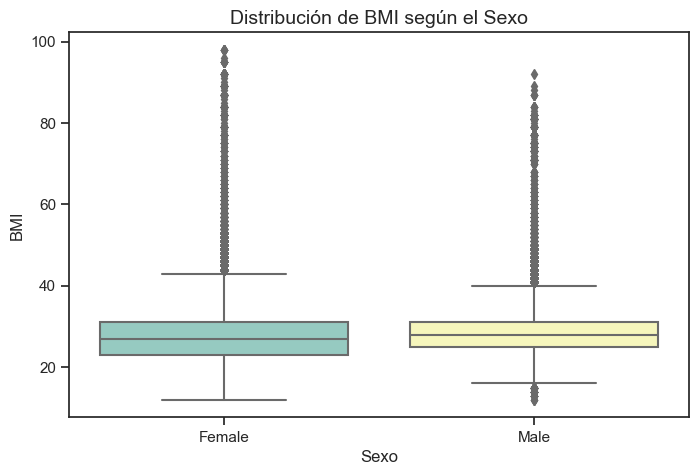

In [130]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='Sex', y='BMI', data=df, palette="Set3")

# Reemplazar etiquetas en el eje X con "Female" y "Male"
sex_labels = [category_labels['Sex'].get(val, str(val)) for val in df['Sex'].unique()]
plt.xticks(ticks=range(len(sex_labels)), labels=sex_labels)

plt.title("Distribución de BMI según el Sexo", fontsize=14)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("BMI", fontsize=12)

plt.show()

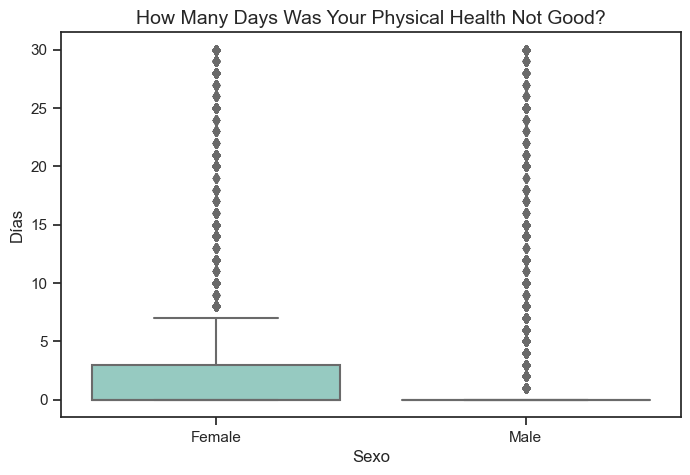

In [131]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='Sex', y='MentHlth', data=df, palette="Set3")

sex_labels = [category_labels['Sex'].get(val, str(val)) for val in df['Sex'].unique()]
plt.xticks(ticks=range(len(sex_labels)), labels=sex_labels)

plt.title("How Many Days Was Your Physical Health Not Good?", fontsize=14)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Días", fontsize=12)

plt.show(block=True)

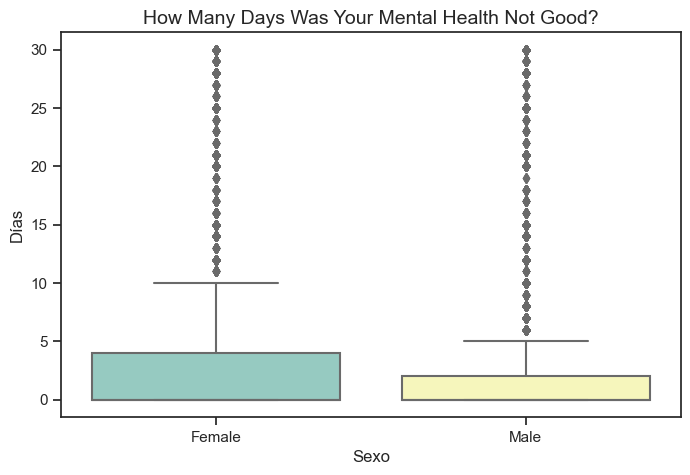

In [132]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='Sex', y='PhysHlth', data=df, palette="Set3")

sex_labels = [category_labels['Sex'].get(val, str(val)) for val in df['Sex'].unique()]
plt.xticks(ticks=range(len(sex_labels)), labels=sex_labels)

plt.title("How Many Days Was Your Mental Health Not Good?", fontsize=14)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Días", fontsize=12)

plt.show(block=True)

## Diagrama de dispersión

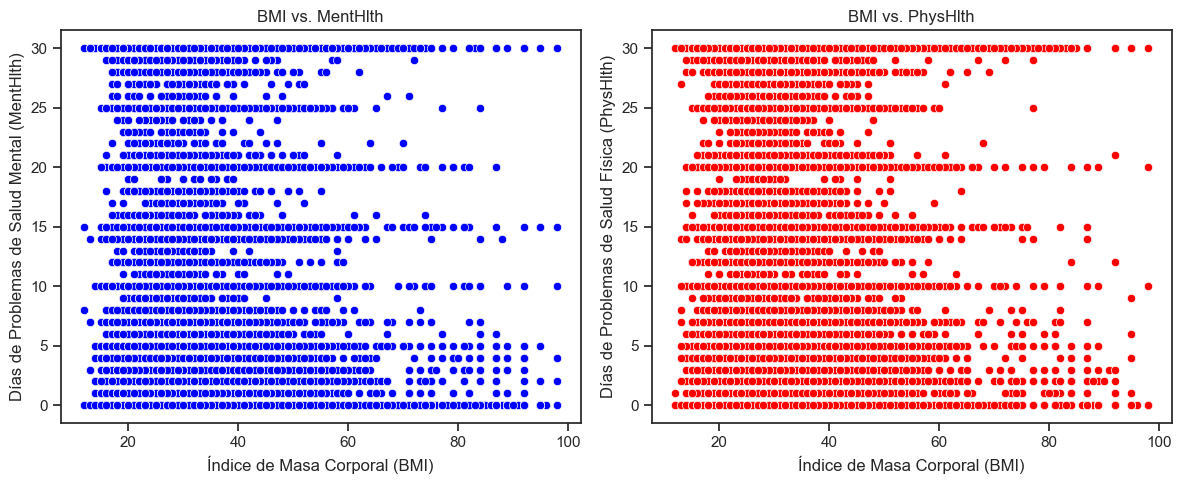

In [133]:
# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Gráfico 1: BMI vs. MentHlth
sns.scatterplot(ax=axes[0], x="BMI", y="MentHlth", data=df, color="blue")
axes[0].set_xlabel("Índice de Masa Corporal (BMI)")
axes[0].set_ylabel("Días de Problemas de Salud Mental (MentHlth)")
axes[0].set_title("BMI vs. MentHlth")

# Gráfico 2: BMI vs. PhysHlth
sns.scatterplot(ax=axes[1], x="BMI", y="PhysHlth", data=df, color="red")
axes[1].set_xlabel("Índice de Masa Corporal (BMI)")
axes[1].set_ylabel("Días de Problemas de Salud Física (PhysHlth)")
axes[1].set_title("BMI vs. PhysHlth")

plt.tight_layout()
plt.show()

## Matriz de correlación

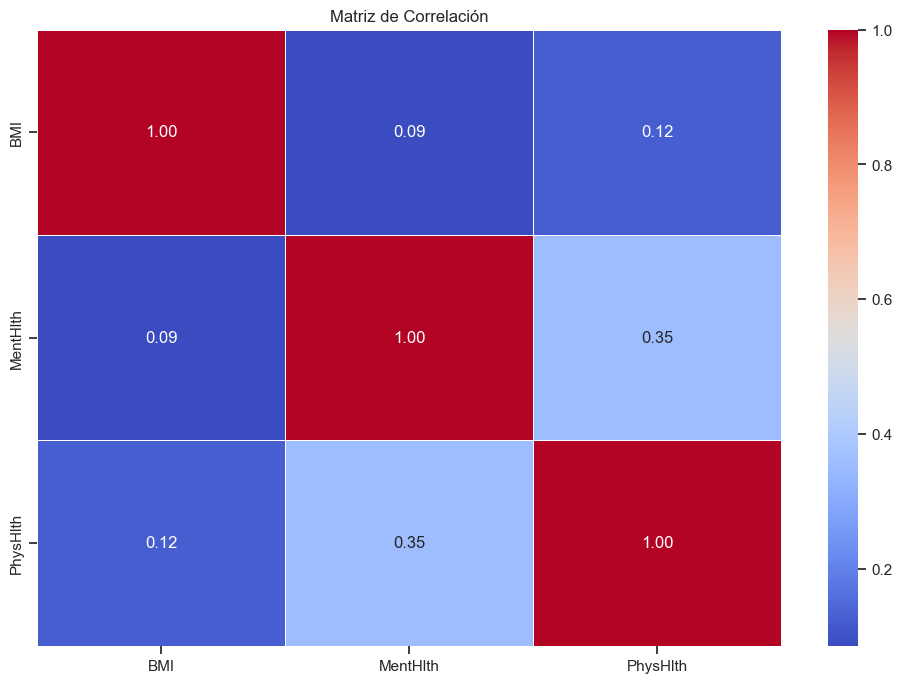

In [134]:
# Filtrar solo las variables de tipo float
df_floats = df.select_dtypes(include=["float"])

# Calcular la matriz de correlación
corr_matrix = df_floats.corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Personalizar etiquetas
plt.title("Matriz de Correlación", fontsize=12)
plt.show()

## Frecuencia datos categóricos

In [135]:
for col in df.select_dtypes(include="category"):
    print(f"Frecuencia de {col}:\n")
    print(df[col].value_counts())
    print("-" * 40) 

Frecuencia de Diabetes_binary:

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64
----------------------------------------
Frecuencia de HighBP:

HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64
----------------------------------------
Frecuencia de HighChol:

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64
----------------------------------------
Frecuencia de CholCheck:

CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64
----------------------------------------
Frecuencia de Smoker:

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64
----------------------------------------
Frecuencia de Stroke:

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64
----------------------------------------
Frecuencia de HeartDiseaseorAttack:

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64
----------------------------------------
Frecuencia de PhysActivity:

PhysActivity
1.0    191920
0.0     61760

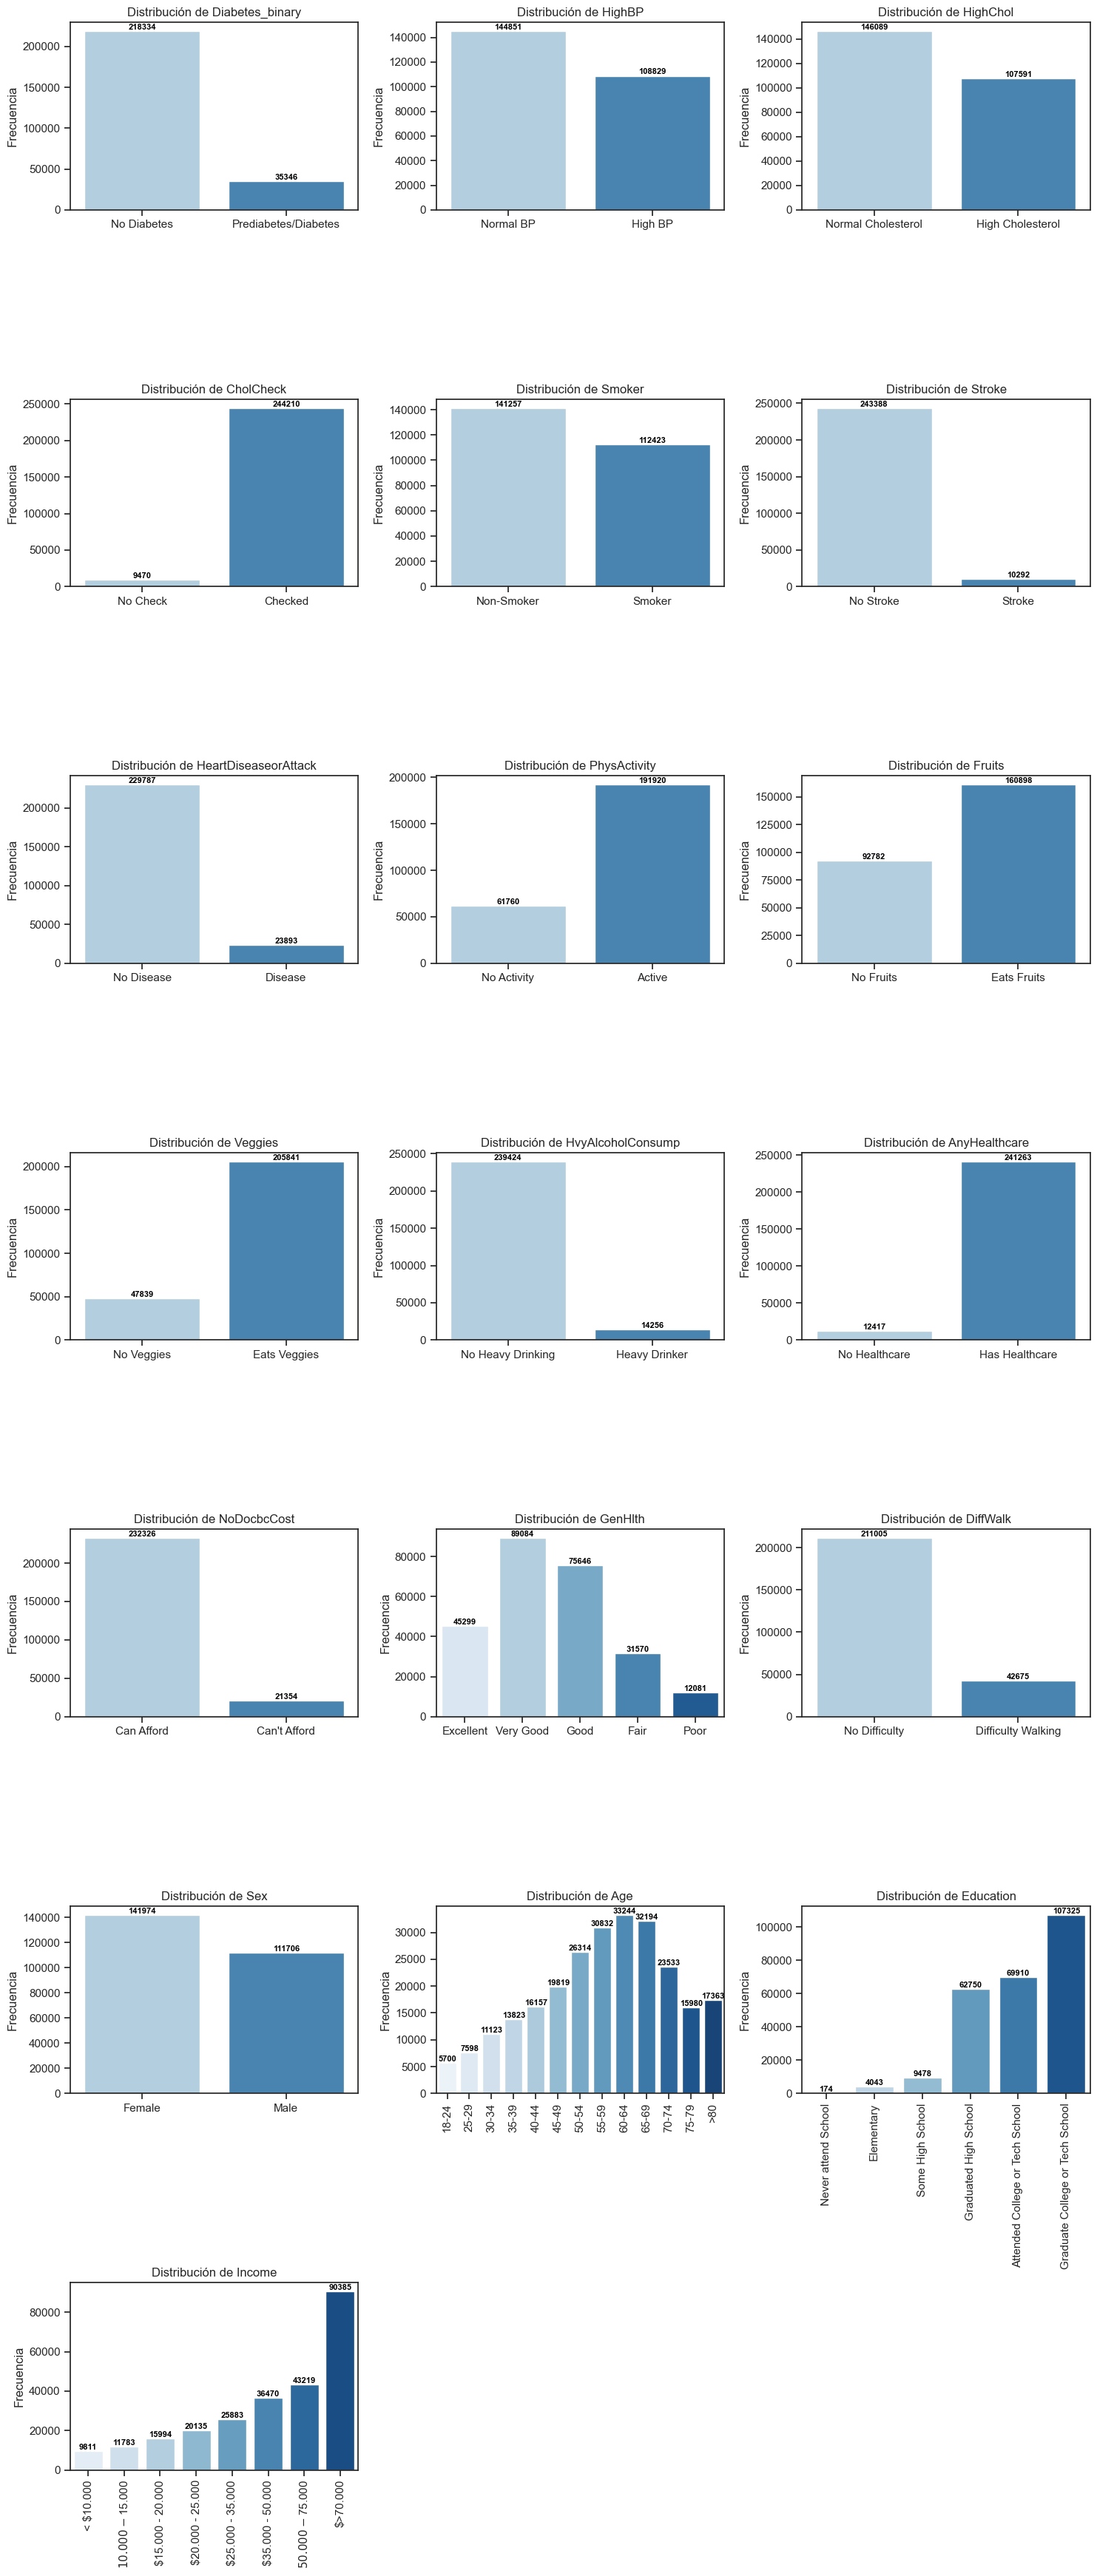

In [136]:

# Variables que tendrán etiquetas giradas en el eje X
rotate_labels = {"Age", "Income", "Education"}  # 🔹 Edita esta lista con las variables que deseas rotar

# Obtener solo las columnas categóricas
categorical_cols = df.select_dtypes(include=["category"]).columns 

# Definir número de columnas por fila
cols_per_row = 3  
num_vars = len(categorical_cols)
num_rows = math.ceil(num_vars / cols_per_row)  # Calcular número de filas necesarias

# Crear la figura y los ejes
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row * 5, num_rows * 5))
axes = axes.flatten()  # Aplanar la matriz de ejes

# Generar gráficos
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, palette="Blues", ax=ax)

    # Obtener etiquetas personalizadas si existen
    labels = category_labels.get(col, {})

    # Obtener los valores únicos de la variable
    unique_values = sorted(df[col].unique())

    # Agregar valores encima de las barras
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f"{height}",  
                    (p.get_x() + p.get_width() / 2, height + 2),  
                    ha='center', va='bottom',
                    fontsize=8, color='black', fontweight='bold')

    # Reemplazar etiquetas en el eje X con nombres personalizados
    if col in category_labels:
        new_labels = [category_labels[col].get(val, str(val)) for val in unique_values]
        rotation_angle = 90 if col in rotate_labels else 0  # Rotar solo si está en la lista
        ax.set_xticks(range(len(unique_values)))
        ax.set_xticklabels(new_labels, rotation=rotation_angle)

    # Personalizar etiquetas
    ax.set_title(f"Distribución de {col}", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

# Eliminar ejes vacíos si hay menos gráficos que subplots creados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()

## Variable objetivo

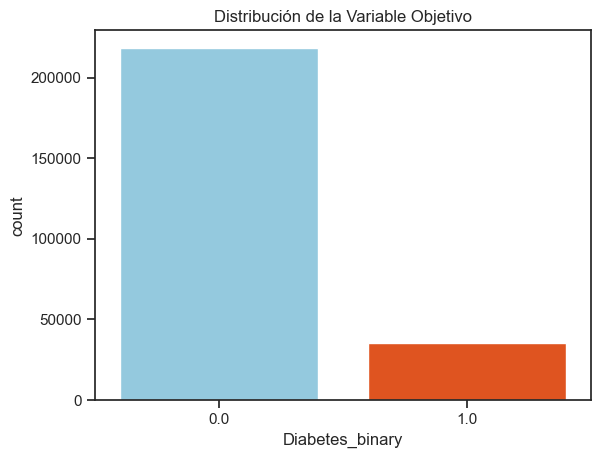

Diabetes_binary
0.0    86.066698
1.0    13.933302
Name: proportion, dtype: float64

In [137]:
# Distribución de la variable objetivo

sns.countplot(x=df['Diabetes_binary'], palette=['skyblue', 'orangered'])
plt.title("Distribución de la Variable Objetivo")
plt.show()

# Cantidad exacta
df['Diabetes_binary'].value_counts(normalize=True) * 100

# MODELOS DE CLASIFICACIÓN

In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Procesamiento de datos

In [6]:

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Dividir en entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir columnas
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']  
binary_features = ['HighBP', 'HighChol','CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                   'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                   'DiffWalk','Sex']
ordinal_features = ['GenHlth','Education','Income']

# Preprocesador: Escalar numéricas, pasar ordinales y binarias
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', 'passthrough', ordinal_features),
        ('bin', 'passthrough', binary_features)
    ])

# Aplicar preprocesamiento
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_prep, y_train)

## Definición de entrenamiento y evaluación

In [7]:
from imblearn.pipeline import Pipeline as ImbPipeline

# Función para entrenar y evaluar el modelo con Pipeline, SMOTE y GridSearchCV
def entrenar_evaluar_modelo_con_pipeline(modelo_base, param_grid, X_train, y_train, X_test, y_test, preprocessor, etiquetas=['Clase 0', 'Clase 1']):
    """
    Entrena y evalúa un modelo con Pipeline, SMOTE y GridSearchCV.
    Devuelve un diccionario con las métricas clave para comparar modelos.
    """
    # Crear pipeline con preprocesador, SMOTE y modelo
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('clasificador', modelo_base)
    ])

    # Configurar GridSearchCV
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

    # Entrenar modelo
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    # Predicción con el mejor modelo
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcular AUC-ROC si es posible
    try:
        y_scores = best_model.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva
        auc = roc_auc_score(y_test, y_scores)
    except:
        auc = None

    # Crear un diccionario con los resultados clave
    resultados = {
        'Modelo': tipo_modelo(modelo_base),
        'Mejores Hiperparámetros': grid.best_params_,
        'Tiempo de Entrenamiento (s)': end_time - start_time,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc
    }

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    resultados['Sensibilidad'] = sensibilidad
    resultados['Especificidad'] = especificidad

    # Mostrar matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.tight_layout()
    plt.show()

    # Mostrar curva ROC
    try:
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}', color='darkorange')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curva ROC')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except:
        print("Este modelo no permite calcular AUC-ROC ni curva ROC.")
    
    return resultados

# Función para obtener el tipo de modelo (Nombre)
def tipo_modelo(modelo):
    if isinstance(modelo, KNeighborsClassifier):
        return "KNN"
    elif isinstance(modelo, LogisticRegression):
        return "Regresión Logística"
    elif isinstance(modelo, GaussianNB):
        return "GaussianNB"
    elif isinstance(modelo, RandomForestClassifier):
        return "Random Forest"
    elif isinstance(modelo, SVC):
        return "SVM"
    elif isinstance(modelo, XGBClassifier):
        return "XGBoost"
    elif isinstance(modelo, StackingClassifier):
        return "Meta-Modelo"
    else:
        return "Otro Modelo"

# Función para comparar los resultados de múltiples modelos
def comparar_modelos(resultados_modelos):
    """
    Compara múltiples modelos y devuelve un DataFrame con sus métricas.
    """
    return pd.DataFrame(resultados_modelos)

## K-Nearest Neighbors (KNN)

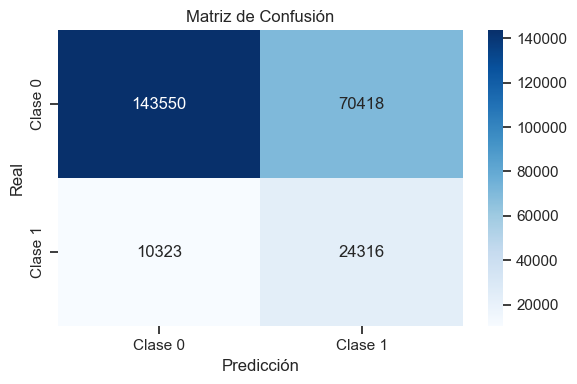

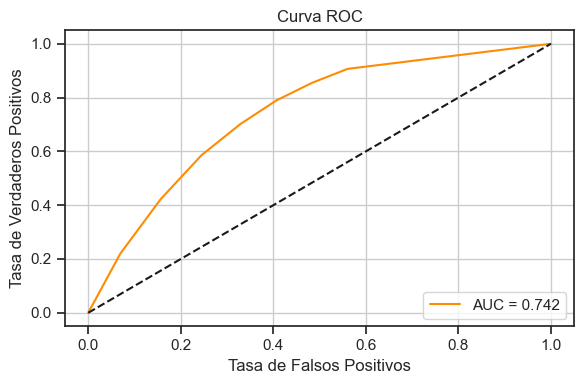


Resultados del modelo KNN:
{'Modelo': 'KNN', 'Mejores Hiperparámetros': {'clasificador__algorithm': 'kd_tree', 'clasificador__n_neighbors': 7, 'clasificador__p': 2, 'clasificador__weights': 'uniform'}, 'Tiempo de Entrenamiento (s)': 6.84510064125061, 'Accuracy': 0.6752263612850805, 'Precision': 0.2566765891865645, 'Recall': 0.7019833136060509, 'F1-Score': 0.3759053280050706, 'AUC-ROC': 0.7422165083498405, 'Sensibilidad': 0.7019833136060509, 'Especificidad': 0.6708947132281463}


In [141]:
# Importar el clasificador 
from sklearn.neighbors import KNeighborsClassifier

# Definir el modelo 
modelo_knn = KNeighborsClassifier()

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_knn = {
    'clasificador__n_neighbors': [3, 5, 7],  # Número de vecinos
    'clasificador__weights': ['uniform', 'distance'],  # Tipo de peso
    'clasificador__p': [1, 2],  # 1 = Manhattan, 2 = Euclidiana
    'clasificador__algorithm': ['kd_tree', 'ball_tree', 'brute']  # Algoritmo de búsqueda
}

# Entrenar y evaluar 
resultados_knn = entrenar_evaluar_modelo_con_pipeline(
    modelo_knn, 
    param_grid_knn, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo KNN:")
print(resultados_knn)



## Regresión Logistica (Ridge / Lasso)

/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/miniconda3/envs/ml_venv/lib/python3.9/site-packages/imblearn/pipeline.py", line 333, in fit
    self._final_estim

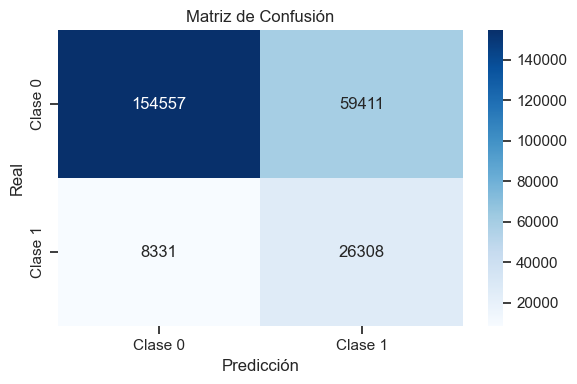

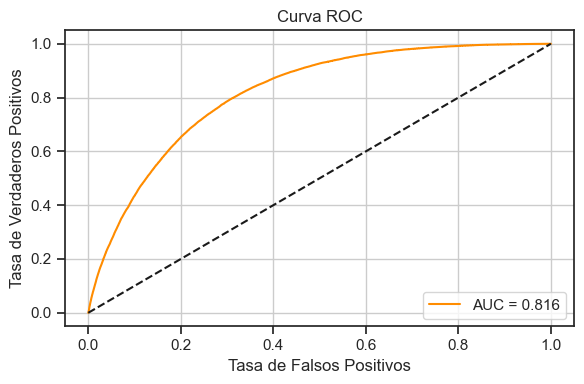


Resultados del modelo de Regresión Logística:
{'Modelo': 'Regresión Logística', 'Mejores Hiperparámetros': {'clasificador__C': 0.01, 'clasificador__class_weight': 'balanced', 'clasificador__penalty': 'l2', 'clasificador__solver': 'liblinear'}, 'Tiempo de Entrenamiento (s)': 2.823896884918213, 'Accuracy': 0.7275137063719043, 'Precision': 0.3069097866284021, 'Recall': 0.7594907474234245, 'F1-Score': 0.4371624653118198, 'AUC-ROC': 0.816153088984727, 'Sensibilidad': 0.7594907474234245, 'Especificidad': 0.7223369849697151}


In [142]:

# Importar el clasificador 
from sklearn.linear_model import LogisticRegression

# Definir el modelo 
modelo_logistica = LogisticRegression(max_iter=1000)

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_logistica = {
    'clasificador__C': [0.01, 0.1, 1, 10],  # Regularización inversa
    'clasificador__solver': ['lbfgs', 'liblinear'],  # Solvers disponibles
    'clasificador__penalty': ['l1','l2'],  # Regularización L2
    'clasificador__class_weight': ['balanced', None]  # Balancear las clases o no
}

# Entrenar y evaluar 
resultados_logistica = entrenar_evaluar_modelo_con_pipeline(
    modelo_logistica, 
    param_grid_logistica, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo de Regresión Logística:")
print(resultados_logistica)



## Naive Bayes

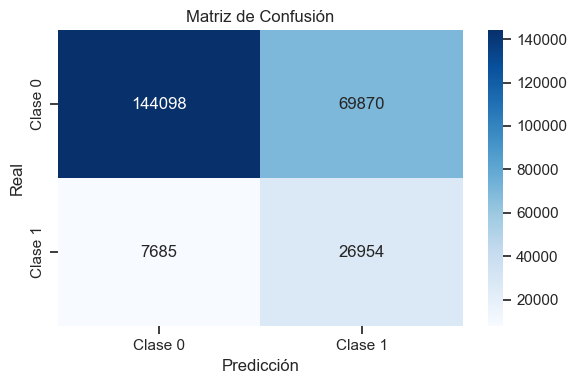

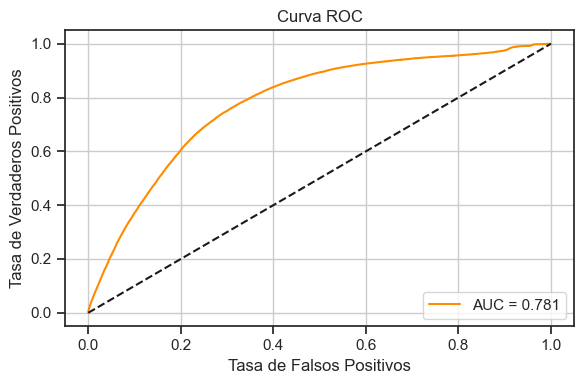


Resultados del modelo GaussianNB:
{'Modelo': 'GaussianNB', 'Mejores Hiperparámetros': {'clasificador__var_smoothing': 1e-09}, 'Tiempo de Entrenamiento (s)': 0.1466991901397705, 'Accuracy': 0.6880417687353936, 'Precision': 0.27838139304304715, 'Recall': 0.778140246542914, 'F1-Score': 0.4100621467637282, 'AUC-ROC': 0.7807953372515376, 'Sensibilidad': 0.778140246542914, 'Especificidad': 0.6734558438645031}


In [143]:

# Importar el clasificador 
from sklearn.naive_bayes import GaussianNB

# Definir el modelo 
modelo_gnb = GaussianNB()

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_gnb = {
    'clasificador__var_smoothing': [1e-9, 1e-8, 1e-7]  
}

# Entrenar y evaluar 
resultados_gnb = entrenar_evaluar_modelo_con_pipeline(
    modelo_gnb, 
    param_grid_gnb, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo GaussianNB:")
print(resultados_gnb)


## XGBOOST

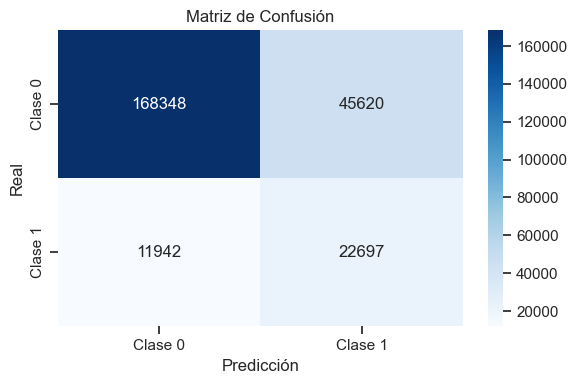

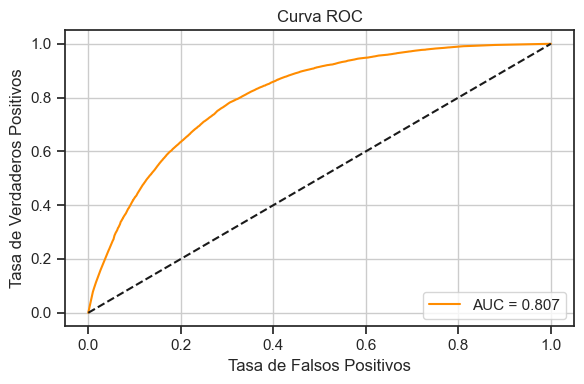


Resultados del modelo xgb:
{'Modelo': 'XGBoost', 'Mejores Hiperparámetros': {'clasificador__colsample_bytree': 0.6, 'clasificador__gamma': 0, 'clasificador__learning_rate': 0.01, 'clasificador__max_depth': 3, 'clasificador__n_estimators': 50, 'clasificador__reg_lambda': 100, 'clasificador__subsample': 0.6}, 'Tiempo de Entrenamiento (s)': 1809.538770198822, 'Accuracy': 0.7684618695370605, 'Precision': 0.3322306307361272, 'Recall': 0.6552440890325933, 'F1-Score': 0.4409067951357862, 'AUC-ROC': 0.807205325209891, 'Sensibilidad': 0.6552440890325933, 'Especificidad': 0.7867905481193449}


In [149]:

# Importar el clasificador
from xgboost import XGBClassifier


# Definir el modelo
modelo_xgb = XGBClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid_xgb = {
    'clasificador__n_estimators': [50, 100, 200],  
    'clasificador__max_depth': [3, 6, 10],  
    'clasificador__learning_rate': [0.01, 0.1, 0.3],  
    'clasificador__subsample': [0.6, 0.8, 1.0],  
    'clasificador__colsample_bytree': [0.6, 0.8, 1.0],  
    'clasificador__gamma': [0, 0.1, 0.3],  
    'clasificador__reg_lambda': [1, 10, 100]  
}

# Entrenar y evaluar 
resultados_XG = entrenar_evaluar_modelo_con_pipeline(
    modelo_xgb, 
    param_grid_xgb, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo xgb:")
print(resultados_XG)


## Random Forest

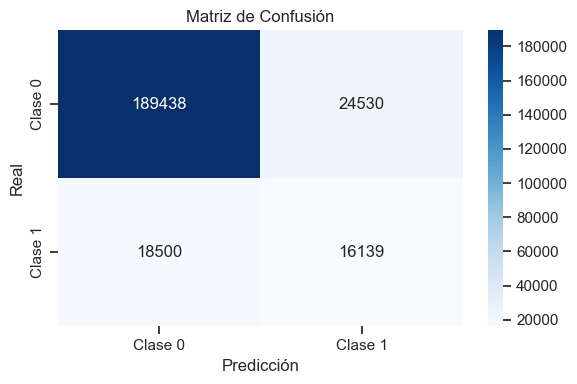

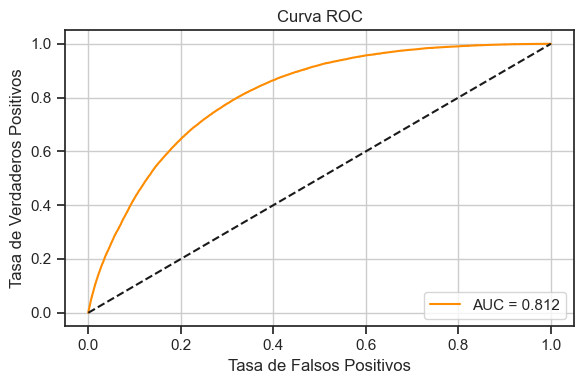


Resultados del modelo RandomForest:
{'Modelo': 'Random Forest', 'Mejores Hiperparámetros': {'clasificador__bootstrap': True, 'clasificador__max_depth': 10, 'clasificador__max_features': 'sqrt', 'clasificador__min_samples_leaf': 1, 'clasificador__min_samples_split': 2, 'clasificador__n_estimators': 200}, 'Tiempo de Entrenamiento (s)': 77.72843289375305, 'Accuracy': 0.8269155735759652, 'Precision': 0.39683788635078315, 'Recall': 0.4659199168567222, 'F1-Score': 0.4286131619482657, 'AUC-ROC': 0.8115612623794425, 'Sensibilidad': 0.4659199168567222, 'Especificidad': 0.8853566888506692}


In [145]:
# Importar el clasificador 
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo 
modelo_rf = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_rf = {
    'clasificador__n_estimators': [100, 200],  # Número de árboles
    'clasificador__max_depth': [None, 10, 20],  # Profundidad máxima del árbol
    'clasificador__min_samples_split': [2, 5],  # Mínimo número de muestras para dividir un nodo
    'clasificador__min_samples_leaf': [1, 2],  # Mínimo número de muestras en una hoja
    'clasificador__max_features': ['sqrt', 'log2'],  # Estrategia para seleccionar características
    'clasificador__bootstrap': [True, False]  # Si usar muestreo con reemplazo
}

# Entrenar y evaluar 
resultados_rf = entrenar_evaluar_modelo_con_pipeline(
    modelo_rf, 
    param_grid_rf, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo RandomForest:")
print(resultados_rf)

## Support Vector Machine

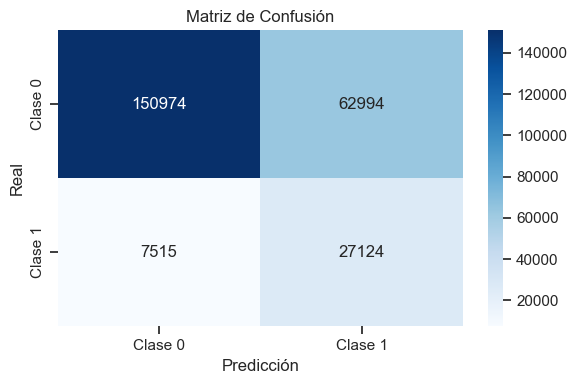

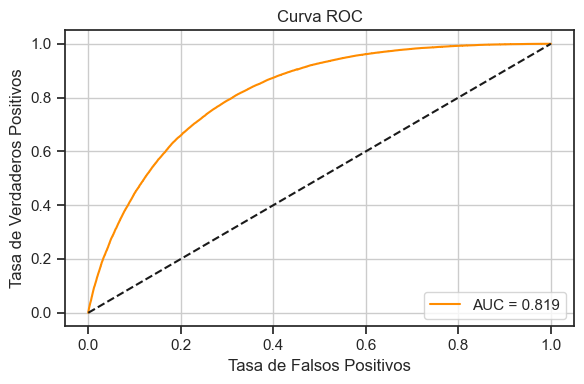


Resultados del modelo SVC:
{'Modelo': 'SVM', 'Mejores Hiperparámetros': {'clasificador__C': 0.1, 'clasificador__gamma': 'scale', 'clasificador__kernel': 'rbf'}, 'Tiempo de Entrenamiento (s)': 155.00673294067383, 'Accuracy': 0.7163836899202356, 'Precision': 0.3009831554184514, 'Recall': 0.7830480094690955, 'F1-Score': 0.43482930817509235, 'AUC-ROC': 0.8187333672114786, 'Sensibilidad': 0.7830480094690955, 'Especificidad': 0.705591490316309}


In [146]:
# Importar el clasificador 
from sklearn.svm import SVC

# Definir el modelo 
modelo_svc = SVC(probability=True, random_state=42)  # probability=True para poder calcular ROC AUC

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_svc = {
    'clasificador__C': [0.1, 1, 10],  # Parámetro de penalización del margen
    'clasificador__kernel': ['linear', 'rbf'],  # Tipo de kernel
    'clasificador__gamma': ['scale', 'auto']  # Parámetro del kernel (relevante para 'rbf')
}

# Entrenar y evaluar 
resultados_svc = entrenar_evaluar_modelo_con_pipeline(
    modelo_svc, 
    param_grid_svc, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo SVC:")
print(resultados_svc)

## Meta modelo

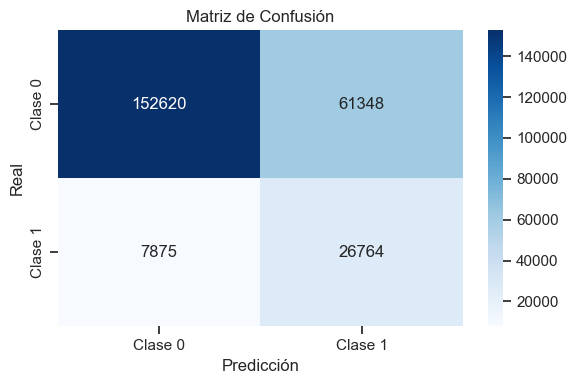

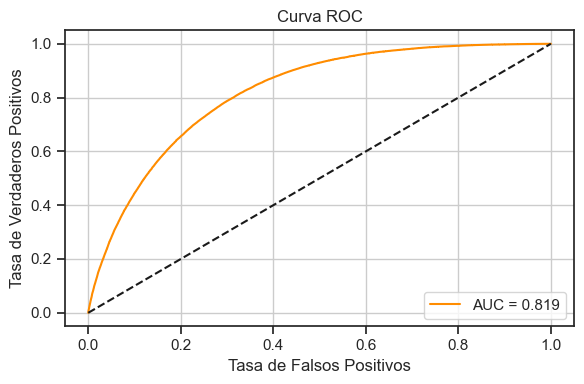


Resultados del modelo StackingClassifier:
{'Modelo': 'Meta-Modelo', 'Mejores Hiperparámetros': {'clasificador__final_estimator__C': 0.01, 'clasificador__svc__C': 0.5}, 'Tiempo de Entrenamiento (s)': 324.7951228618622, 'Accuracy': 0.7215565128898221, 'Precision': 0.30374977301616124, 'Recall': 0.7726550997430641, 'F1-Score': 0.4360697672524052, 'AUC-ROC': 0.8190711344029307, 'Sensibilidad': 0.7726550997430641, 'Especificidad': 0.713284229417483}


In [147]:


# Importar librería
from sklearn.ensemble import StackingClassifier

# Definir modelos base para el stacking
estimadores_stacking = [
    ('svc', SVC(probability=True, C=0.1, gamma='scale', random_state=42)),
    ('gnb', GaussianNB()),
    ('lr', LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear', random_state=42))
]

# Meta-modelo
final_estimator = LogisticRegression(class_weight='balanced', C=0.01, solver='liblinear', random_state=42)

# Definir el StackingClassifier
modelo_stacking = StackingClassifier(
    estimators=estimadores_stacking,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_stacking = {
    'clasificador__final_estimator__C': [0.01, 0.1, 1.0],  # Regularización del meta-modelo
    'clasificador__svc__C': [0.05, 0.1, 0.5],              # Regularización de SVM
}

# Entrenar y evaluar 
resultados_stacking = entrenar_evaluar_modelo_con_pipeline(
    modelo_stacking, 
    param_grid_stacking, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo StackingClassifier:")
print(resultados_stacking)

## Comparar modelos

In [153]:
# Almacenar los resultados en una lista
resultados_comparacion = [resultados_knn, resultados_logistica, resultados_gnb, resultados_rf, 
                          resultados_svc, resultados_XG, resultados_stacking]

# Comparar modelos
df_comparacion = comparar_modelos(resultados_comparacion)

# Mostrar tabla comparativa
print(df_comparacion)

                Modelo                            Mejores Hiperparámetros  \
0                  KNN  {'clasificador__algorithm': 'kd_tree', 'clasif...   
1  Regresión Logística  {'clasificador__C': 0.01, 'clasificador__class...   
2           GaussianNB             {'clasificador__var_smoothing': 1e-09}   
3        Random Forest  {'clasificador__bootstrap': True, 'clasificado...   
4                  SVM  {'clasificador__C': 0.1, 'clasificador__gamma'...   
5              XGBoost  {'clasificador__colsample_bytree': 0.6, 'clasi...   
6          Meta-Modelo  {'clasificador__final_estimator__C': 0.01, 'cl...   

   Tiempo de Entrenamiento (s)  Accuracy  Precision    Recall  F1-Score  \
0                     6.845101  0.675226   0.256677  0.701983  0.375905   
1                     2.823897  0.727514   0.306910  0.759491  0.437162   
2                     0.146699  0.688042   0.278381  0.778140  0.410062   
3                    77.728433  0.826916   0.396838  0.465920  0.428613   
4       

In [ ]:
df_comparacion.style.apply(
    lambda x: ['background: lightgreen' if v == x['Recall'].max() else '' for v in x['Recall']],
    axis=0, subset=['Recall']
)

In [ ]:

mejor_recall = df_comparacion.loc[df_comparacion['Recall'].idxmax()]


print("Modelo con mejor Recall:")
print(mejor_recall)

Modelo con mejor Recall:
Modelo                                                                       SVM
Mejores Hiperparámetros        {'clasificador__C': 0.1, 'clasificador__gamma'...
Tiempo de Entrenamiento (s)                                           155.006733
Accuracy                                                                0.716384
Precision                                                               0.300983
Recall                                                                  0.783048
F1-Score                                                                0.434829
AUC-ROC                                                                 0.818733
Sensibilidad                                                            0.783048
Especificidad                                                           0.705591
Name: 4, dtype: object


# MODELOS DE REGRESIÓN

In [157]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera
warnings.filterwarnings('ignore')

In [158]:

df = pd.read_csv('diabetes.csv')

X = df.drop('BMI', axis=1)  
y = df['BMI']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98, random_state=42)


numeric_features = [ 'MentHlth', 'PhysHlth', 'Age']  
binary_features = ['HighBP', 'HighChol','CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                   'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                   'DiffWalk','Sex']
ordinal_features = ['GenHlth','Education','Income']


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', 'passthrough', ordinal_features),
        ('bin', 'passthrough', binary_features)
    ])

# Aplicar preprocesamiento
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [159]:
from imblearn.pipeline import Pipeline as ImbPipeline
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Función para entrenar y evaluar el modelo con Pipeline y GridSearchCV
def entrenar_evaluar_modelo_con_pipeline_regresion(modelo_base, param_grid, X_train, y_train, X_test, y_test, preprocessor):
    """
    Entrena y evalúa un modelo con Pipeline y GridSearchCV para regresión.
    Devuelve un diccionario con las métricas clave para comparar modelos.
    """
    # Crear pipeline con preprocesador y modelo
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('regresor', modelo_base)
    ])

    # Configurar GridSearchCV
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Entrenar modelo
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    # Predicción con el mejor modelo
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calcular las métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calcular ACF de los residuos y p-value de Ljung-Box
    residuos = y_test - y_pred
    ljung_box_pvalue = acorr_ljungbox(residuos, lags=[10], return_df=True)['lb_pvalue'].values[0]

    # Test Jarque-Bera
    jb_stat, jb_pvalue = stats.jarque_bera(residuos)

    # Crear un diccionario con los resultados clave
    resultados = {
        'Modelo': tipo_modelo(modelo_base),
        'Mejores Hiperparámetros': grid.best_params_,
        'Tiempo de Entrenamiento (s)': end_time - start_time,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2,
        'Ljung-Box p-value': ljung_box_pvalue,
        'Jarque-Bera p-value': jb_pvalue
    }

    # Graficar la relación entre las predicciones y la variable objetivo
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.6, color='darkorange')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k', linestyle='--')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Predicho')
    plt.title('Real vs Predicho')
    plt.tight_layout()
    plt.show()

    # Graficar el histograma de los residuos
    plt.figure(figsize=(6, 4))
    plt.hist(residuos, bins=20, color='dodgerblue', alpha=0.7)
    plt.title('Histograma de Residuos')
    plt.xlabel('Residuos')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    return resultados

# Función para obtener el tipo de modelo (Nombre)
def tipo_modelo(modelo):
    if isinstance(modelo, KNeighborsRegressor):
        return "KNN"
    elif isinstance(modelo, LinearRegression):
        return "Regresión Lineal"
    elif isinstance(modelo, Ridge):
        return "Ridge"
    elif isinstance(modelo, Lasso):
        return "Lasso"
    elif isinstance(modelo, RandomForestRegressor):
        return "RandomForestRegressor"
    elif isinstance(modelo, XGBRegressor):
        return "XGBoost Regressor"
    elif isinstance (modelo, SVR):
        return "SVR"
    elif isinstance(modelo, StackingRegressor):
        return "Stacking"
    else:
        return "Otro Modelo"

# Función para comparar los resultados de múltiples modelos
def Comparar_modelos(resultados_modelos):
    """
    Compara múltiples modelos y devuelve un DataFrame con sus métricas.
    """
    return pd.DataFrame(resultados_modelos)

## K-Nearest Neighbors (KNN)

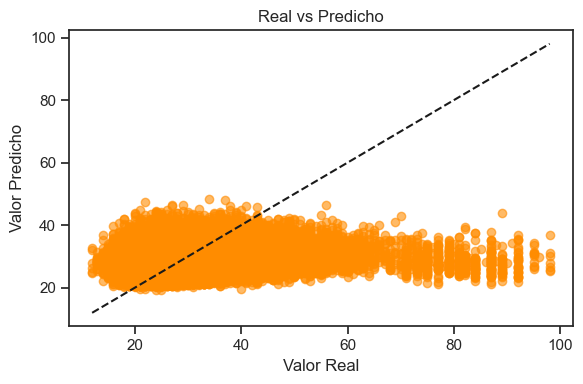

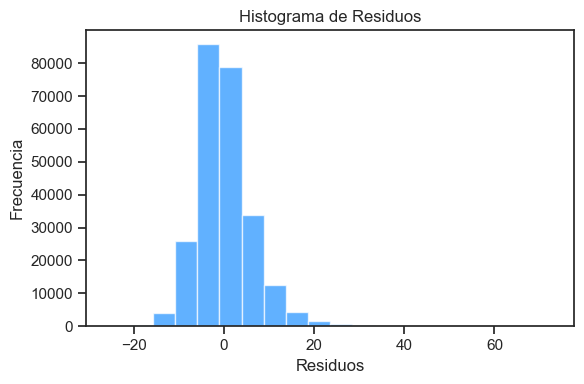


Resultados del modelo KNN:
{'Modelo': 'KNN', 'Mejores Hiperparámetros': {'regresor__n_neighbors': 7, 'regresor__p': 1, 'regresor__weights': 'uniform'}, 'Tiempo de Entrenamiento (s)': 2.7842087745666504, 'RMSE': 6.516463901796337, 'MAPE': 0.16010498553425878, 'R²': 0.02918624254931379, 'Ljung-Box p-value': 0.3565429172946578, 'Jarque-Bera p-value': 0.0}


In [160]:

from sklearn.neighbors import KNeighborsRegressor

# Definir el modelo 
modelo_knn = KNeighborsRegressor()

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_knn = {
    'regresor__n_neighbors': [3, 5, 7],  # Número de vecinos
    'regresor__weights': ['uniform', 'distance'],  # Tipo de peso
    'regresor__p': [1, 2]  # 1 = Manhattan, 2 = Euclidiana
}

# Entrenar y evaluar
Resultados_knn = entrenar_evaluar_modelo_con_pipeline_regresion(
    modelo_knn, 
    param_grid_knn, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo KNN:")
print(Resultados_knn)


## REGRESIÓN LINEAL

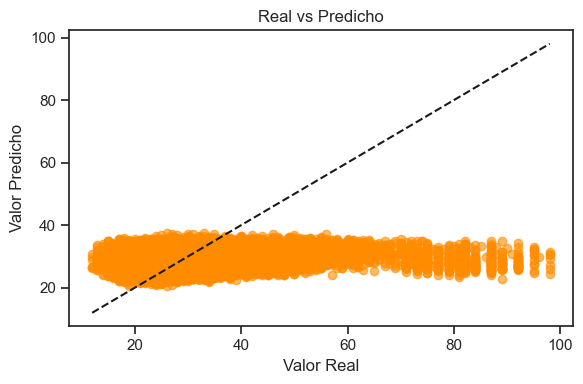

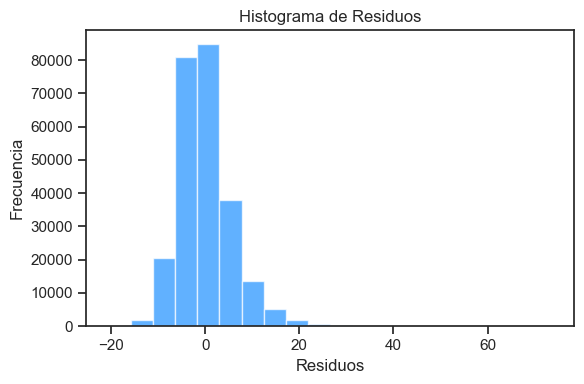


Resultados del modelo de regresión lineal:
{'Modelo': 'Regresión Lineal', 'Mejores Hiperparámetros': {'regresor__fit_intercept': True}, 'Tiempo de Entrenamiento (s)': 0.18139886856079102, 'RMSE': 6.218062593293787, 'MAPE': 0.15351996767589166, 'R²': 0.11606137085900925, 'Ljung-Box p-value': 0.1479074741807376, 'Jarque-Bera p-value': 0.0}


In [161]:
# Importar el regresor 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Definir el modelo 
modelo_regresion = LinearRegression()

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_regresion = {
    'regresor__fit_intercept': [True, False],  # Incluir el término independiente o no
}

# Entrenar y evaluar el modelo de 
Resultados_regresion = entrenar_evaluar_modelo_con_pipeline_regresion(
    modelo_regresion, 
    param_grid_regresion, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo de regresión lineal:")
print(Resultados_regresion)



# RIDGE

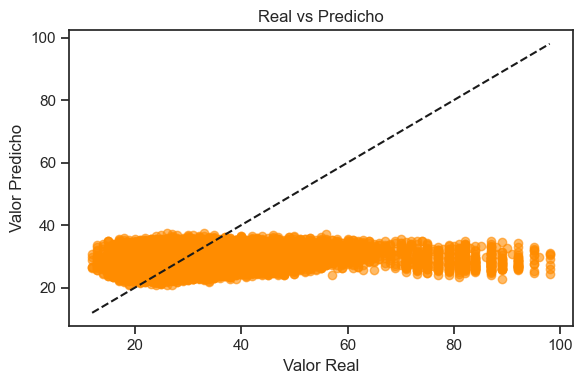

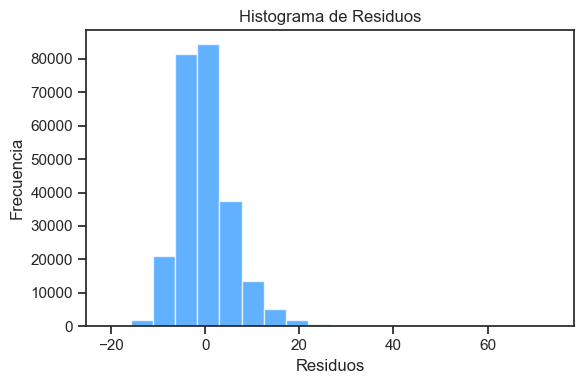


Resultados del modelo Ridge:
{'Modelo': 'Ridge', 'Mejores Hiperparámetros': {'regresor__alpha': 10, 'regresor__fit_intercept': True}, 'Tiempo de Entrenamiento (s)': 0.1790001392364502, 'RMSE': 6.217635362462297, 'MAPE': 0.1534888245014101, 'R²': 0.11618283404989815, 'Ljung-Box p-value': 0.14958829768634185, 'Jarque-Bera p-value': 0.0}


In [162]:
# Importar el regresor 
from sklearn.linear_model import Ridge

# Definir el modelo 
modelo_ridge = Ridge()

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_ridge = {
    'regresor__alpha': [0.1, 1, 10, 100],  # Parámetro de regularización
    'regresor__fit_intercept': [True, False],  # Incluir el término independiente o no
}

# Entrenar y evaluar 
Resultados_ridge = entrenar_evaluar_modelo_con_pipeline_regresion(
    modelo_ridge, 
    param_grid_ridge, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo Ridge:")
print(Resultados_ridge)


# LASSO

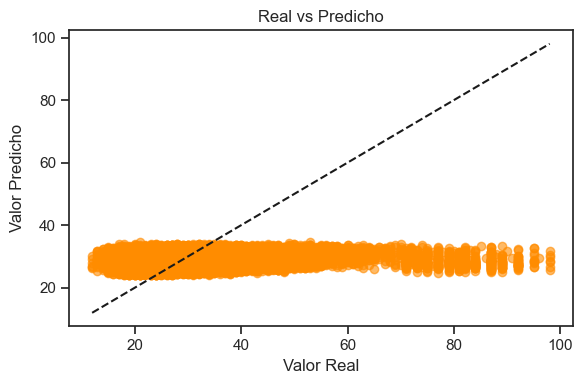

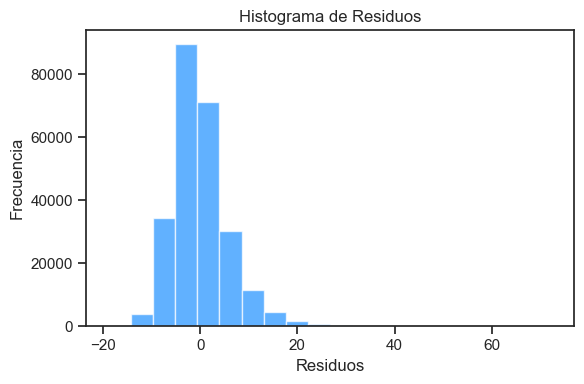


Resultados del modelo Lasso:
{'Modelo': 'Lasso', 'Mejores Hiperparámetros': {'regresor__alpha': 0.1, 'regresor__fit_intercept': True}, 'Tiempo de Entrenamiento (s)': 0.21306490898132324, 'RMSE': 6.249366417081727, 'MAPE': 0.15429612107671722, 'R²': 0.10713887759559015, 'Ljung-Box p-value': 0.2651662617308366, 'Jarque-Bera p-value': 0.0}


In [164]:
# Importar el regresor Lasso
from sklearn.linear_model import Lasso

# Definir el modelo Lasso
modelo_lasso = Lasso()

# Definir el espacio de búsqueda de hiperparámetros para Lasso
param_grid_lasso = {
    'regresor__alpha': [0.1, 1, 10, 100],  # Parámetro de regularización
    'regresor__fit_intercept': [True, False],  # Incluir el término independiente o no
}

# Entrenar y evaluar el modelo Lasso
Resultados_lasso = entrenar_evaluar_modelo_con_pipeline_regresion(
    modelo_lasso, 
    param_grid_lasso, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados del modelo Lasso
print("\nResultados del modelo Lasso:")
print(Resultados_lasso)

# RANDOM FOREST

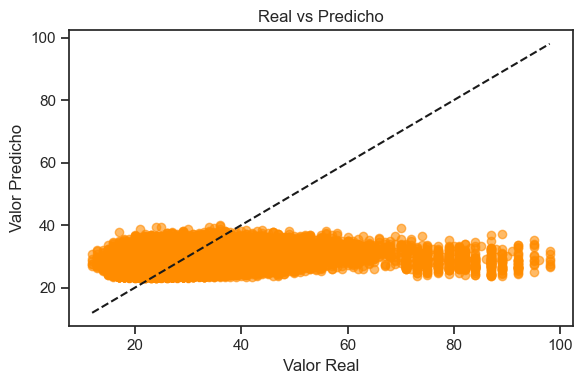

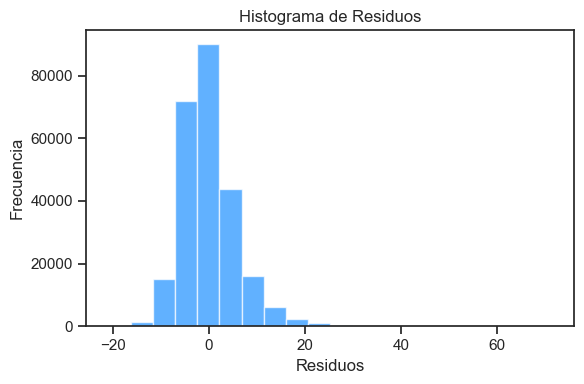


Resultados del modelo Random Forest:
{'Modelo': 'RandomForestRegressor', 'Mejores Hiperparámetros': {'regresor__max_depth': 20, 'regresor__max_features': 'sqrt', 'regresor__min_samples_leaf': 4, 'regresor__min_samples_split': 10, 'regresor__n_estimators': 100}, 'Tiempo de Entrenamiento (s)': 52.873852252960205, 'RMSE': 6.160555539830134, 'MAPE': 0.15110489774027483, 'R²': 0.1323357794740866, 'Ljung-Box p-value': 0.2668605045527275, 'Jarque-Bera p-value': 0.0}


In [165]:
# Importar el regresor 
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo
modelo_rf = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'regresor__n_estimators': [50, 100, 200],  # Número de árboles
    'regresor__max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar para cada división
    'regresor__max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'regresor__min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'regresor__min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en cada hoja
}

# Entrenar y evaluar el modelo Random Forest
Resultados_rf = entrenar_evaluar_modelo_con_pipeline_regresion(
    modelo_rf, 
    param_grid_rf, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo Random Forest:")
print(Resultados_rf)

# XGBOOST

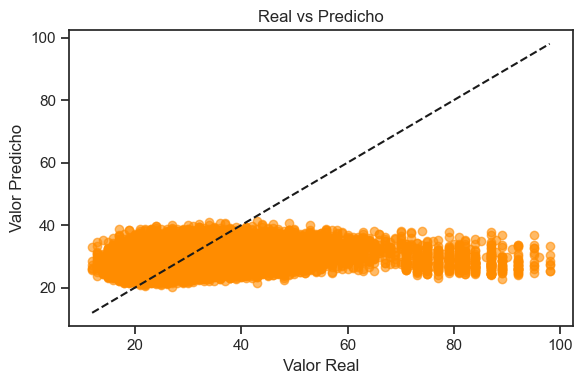

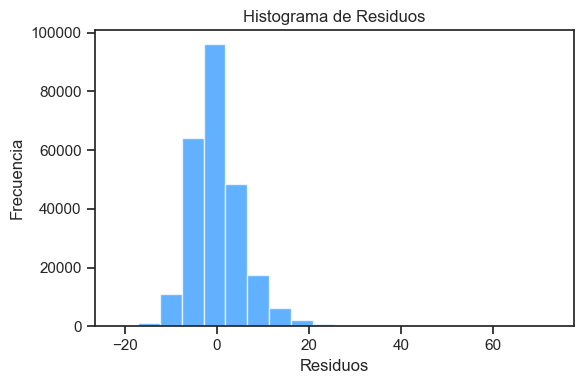


Resultados del modelo XGBoost:
{'Modelo': 'XGBoost Regressor', 'Mejores Hiperparámetros': {'regresor__alpha': 1, 'regresor__colsample_bytree': 0.8, 'regresor__lambda': 10, 'regresor__learning_rate': 0.2, 'regresor__max_depth': 3, 'regresor__n_estimators': 50, 'regresor__subsample': 0.8}, 'Tiempo de Entrenamiento (s)': 264.1570477485657, 'RMSE': 6.122634335684304, 'MAPE': 0.14976158078254562, 'R²': 0.14298469100977007, 'Ljung-Box p-value': 0.28903236954778394, 'Jarque-Bera p-value': 0.0}


In [166]:
# Importar el regresor
from xgboost import XGBRegressor

# Definir el modelo 
modelo_xgb = XGBRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_xgb = {
    'regresor__n_estimators': [50, 100, 200],  # Número de árboles
    'regresor__learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'regresor__max_depth': [3, 5, 7],  # Profundidad máxima de los árboles
    'regresor__subsample': [0.8, 0.9, 1.0],  # Proporción de muestras para entrenar cada árbol
    'regresor__colsample_bytree': [0.8, 0.9, 1.0],  # Proporción de características a considerar por árbol
    'regresor__alpha': [0, 0.1, 1],  # Regularización L1
    'regresor__lambda': [0, 1, 10],  # Regularización L2
}

# Entrenar y evaluar 
Resultados_xgb = entrenar_evaluar_modelo_con_pipeline_regresion(
    modelo_xgb, 
    param_grid_xgb, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados del modelo XGBoost
print("\nResultados del modelo XGBoost:")
print(Resultados_xgb)

## SUPPORT VECTOR REGRESSION

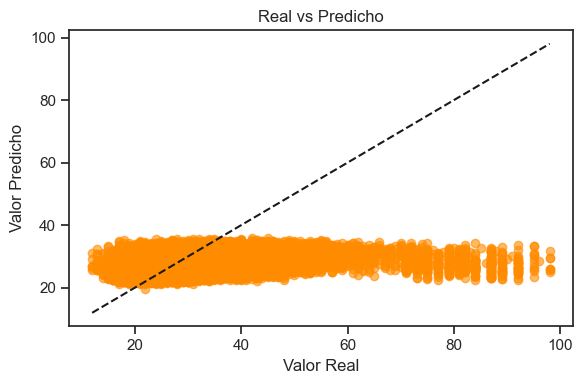

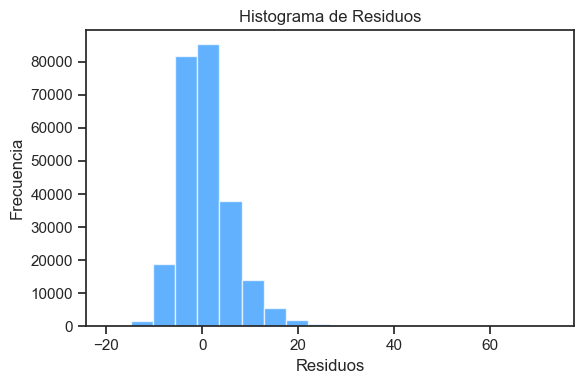


Resultados del modelo SVR:
{'Modelo': 'SVR', 'Mejores Hiperparámetros': {'regresor__C': 10, 'regresor__epsilon': 0.5, 'regresor__gamma': 'scale'}, 'Tiempo de Entrenamiento (s)': 24.495577812194824, 'RMSE': 6.199701221489164, 'MAPE': 0.14372358198716184, 'R²': 0.1212740435341163, 'Ljung-Box p-value': 0.3649409896867029, 'Jarque-Bera p-value': 0.0}


In [167]:
# Importar el regresor 
from sklearn.svm import SVR

# Definir el modelo 
modelo_svr = SVR(kernel='rbf')

# Definir el espacio de búsqueda de hiperparámetros 
param_grid_svr = {
    'regresor__C': [0.1, 1, 10],  # Parámetro de penalización
    'regresor__epsilon': [0.1, 0.2, 0.5],  # Tolerancia para el error
    'regresor__gamma': ['scale', 'auto'],  # Coeficiente del kernel RBF
}

# Entrenar y evaluar 
Resultados_svr = entrenar_evaluar_modelo_con_pipeline_regresion(
    modelo_svr, 
    param_grid_svr, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    preprocessor
)

# Mostrar los resultados 
print("\nResultados del modelo SVR:")
print(Resultados_svr)

## Meta Modelo Regresión

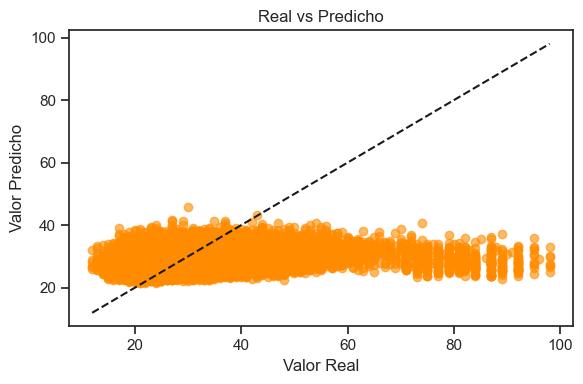

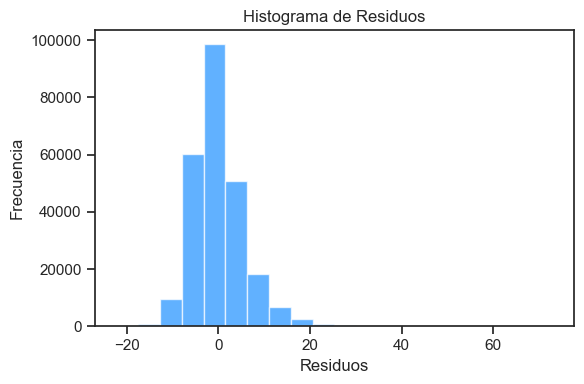


Resultados del modelo Stacking:
{'Modelo': 'Stacking', 'Mejores Hiperparámetros': {'regresor__final_estimator__alpha': 10.0, 'regresor__rf__max_depth': 10, 'regresor__rf__n_estimators': 200, 'regresor__xgb__max_depth': 3}, 'Tiempo de Entrenamiento (s)': 326.64421105384827, 'RMSE': 6.122817891640234, 'MAPE': 0.14947677760906772, 'R²': 0.1429333037755386, 'Ljung-Box p-value': 0.30548665111936485, 'Jarque-Bera p-value': 0.0}


In [168]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor

# 📌 Definir los estimadores base
estimators = [
    ('xgb', XGBRegressor(n_estimators=100, max_depth=3, random_state=42, verbosity=0)),
    ('svr', SVR(C=1.0, epsilon=0.2)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# 📌 Definir el stacking regressor
modelo_stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1
)

# 📌 Definir espacio de búsqueda de hiperparámetros
param_grid_stacking = {
    'regresor__final_estimator__alpha': [1.0, 5.0, 10.0],
    'regresor__xgb__max_depth': [3, 5],
    'regresor__rf__max_depth': [10, 20],
    'regresor__rf__n_estimators': [100, 200]
}

# 📌 Entrenar y evaluar
Resultados_stacking = entrenar_evaluar_modelo_con_pipeline_regresion(
    modelo_stacking,
    param_grid_stacking,
    X_train,
    y_train,
    X_test,
    y_test,
    preprocessor
)

# 📌 Mostrar resultados
print("\nResultados del modelo Stacking:")
print(Resultados_stacking)

## Comparación

In [171]:
# Almacenar los resultados en una lista
Resultados_comparacion = [Resultados_knn, Resultados_regresion, Resultados_ridge,  Resultados_lasso, 
                          Resultados_svr, Resultados_xgb,Resultados_rf,Resultados_stacking]

# Comparar modelos
Df_comparacion = Comparar_modelos(Resultados_comparacion)

# Mostrar tabla comparativa
print(Df_comparacion)

                  Modelo                            Mejores Hiperparámetros  \
0                    KNN  {'regresor__n_neighbors': 7, 'regresor__p': 1,...   
1       Regresión Lineal                  {'regresor__fit_intercept': True}   
2                  Ridge  {'regresor__alpha': 10, 'regresor__fit_interce...   
3                  Lasso  {'regresor__alpha': 0.1, 'regresor__fit_interc...   
4                    SVR  {'regresor__C': 10, 'regresor__epsilon': 0.5, ...   
5      XGBoost Regressor  {'regresor__alpha': 1, 'regresor__colsample_by...   
6  RandomForestRegressor  {'regresor__max_depth': 20, 'regresor__max_fea...   
7               Stacking  {'regresor__final_estimator__alpha': 10.0, 're...   

   Tiempo de Entrenamiento (s)      RMSE      MAPE        R²  \
0                     2.784209  6.516464  0.160105  0.029186   
1                     0.181399  6.218063  0.153520  0.116061   
2                     0.179000  6.217635  0.153489  0.116183   
3                     0.213065  

In [174]:

mejor_RMSE = Df_comparacion.loc[Df_comparacion['RMSE'].idxmax()]


print("Modelo con mejor RMSE:")
print(mejor_RMSE)



Modelo con mejor RMSE:
Modelo                                                                       KNN
Mejores Hiperparámetros        {'regresor__n_neighbors': 7, 'regresor__p': 1,...
Tiempo de Entrenamiento (s)                                             2.784209
RMSE                                                                    6.516464
MAPE                                                                    0.160105
R²                                                                      0.029186
Ljung-Box p-value                                                       0.356543
Jarque-Bera p-value                                                          0.0
Name: 0, dtype: object
